## <center>Assignment 3 - Machine Learning <br> Notebook made by  </center>

|**Name** | **Student id** | **email**|
|:- |:-|:-|
|Narendra Parigi|12089265|naren.parigi@gmail.com|
|Tim Pellenkoft|0440884|ccc@xxx.nl|
|Ralph Nabben|12309001|ralph.nabben@tip.nl|
|Ahron Zijlstra|6087418|ccc@xxx.nl|


In [1]:
import os
import gzip
import requests
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from urllib.request import urlopen

pd.options.display.max_columns = None
%matplotlib inline
warnings.filterwarnings('ignore')
#pd.options.mode.chained_assignment = None

### <a> 0. Approach </a>

- The dataset is big so, we will use the sample data set (kddcup.data_10_percent.gz -> 10% subset) as training data for the assignment.
- The best models are evaluated against the labeled test dataset (corrected.gz -> test data with corrected labels)

### <a> 1. Download Data </a>

Lets define datatypes in such way the datasets uses less memory and computations are faser.

In [2]:
dtypes = { "duration": np.int8, "protocol_type": np.object, "service": np.object, "flag": np.object,
           "src_bytes":  np.int8, "dst_bytes":  np.int8, "land": np.bool, "wrong_fragment":  np.int8,
           "urgent": np.int8, "hot": np.int8, "num_failed_logins":  np.int8, "logged_in":  np.bool,
           "num_compromised":  np.int8, "root_shell":  np.bool, "su_attempted":  np.int8, "num_root": np.int8,
           "num_file_creations":  np.int8, "num_shells":  np.int8, "num_access_files":  np.int8, 
           "num_outbound_cmds":  np.int8, "is_host_login":  np.bool, "is_guest_login":  np.bool,
           "count": np.int8, "srv_count":  np.int8, "serror_rate": np.float16, "srv_serror_rate": np.float16,
           "rerror_rate": np.float16, "srv_rerror_rate": np.float16, "same_srv_rate": np.float64, 
           "diff_srv_rate": np.float16, "srv_diff_host_rate": np.float16, "dst_host_count":  np.int8,
           "dst_host_srv_count":  np.int8, "dst_host_same_srv_rate": np.float64, "dst_host_diff_srv_rate": np.float16,
           "dst_host_same_src_port_rate": np.float16, "dst_host_srv_diff_host_rate": np.float16,
           "dst_host_serror_rate": np.float16, "dst_host_srv_serror_rate": np.float16, "dst_host_rerror_rate": np.float16,
           "dst_host_srv_rerror_rate": np.float16, "attack": np.object }

Map column names for both training and test dataset

In [3]:
cnames = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
          'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
          'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
          'num_shells','num_access_files','num_outbound_cmds','is_host_login',
          'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
          'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
          'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
          'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
          'dst_host_rerror_rate','dst_host_srv_rerror_rate','attack']

#### <a> 1.1 Train dataset </a>

The below code snippet downloads the <b> training </b> dataset from API.

In [4]:
url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('kddcup.data_10_percent.gz') as f:
     df_train = pd.read_csv(f, names=cnames, dtype=dtypes, header=None)
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,-75,74,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.109985,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,-17,-26,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.049988,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,-21,57,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,-37,57,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,-39,-16,False,0,0,0,0,True,0,False,0,0,0,0,0,0,False,False,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.020004,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
print('The number of categories in train data set {}'.format(len(df_train['attack'].unique())))
print('The size of the train dataset is {}'.format(df_train.shape[0]))

The number of categories in train data set 23
The size of the train dataset is 494021


In total, there are 42 columns including target column. The train dataset has 23 categories mapped to target column.

#### <a> 1.2 Test dataset </a>

The below code snippet downloads the <b> test </b> dataset from API.

In [6]:
url = "https://kdd.ics.uci.edu/databases/kddcup99/corrected.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('corrected.gz') as f:
     df_test = pd.read_csv(f, names=cnames, dtype=dtypes, header=None)
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.000000,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,-110,False,0,0,0,0,False,0,False,0,0,0,0,0,0,False,False,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-2,1.0,0.010002,0.010002,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [8]:
print('The number of categories in test data set {}'.format(len(df_test['attack'].unique())))

The number of categories in test data set 38


In total, there are 42 columns including target column. There are 38 categories mapped to target column. Thus, in test dataset we have unseen categories, the model will not perform good with unseen categories so, we will select only the categories common in both test and train data set.

In [9]:
df_test = df_test[df_test['attack'].isin(df_train['attack'].unique())]
print('The number of categories in train data set after filtering {}'.format(len(df_test['attack'].unique())))
print('The size of the test dataset is {}'.format(df_test.shape[0]))

The number of categories in train data set after filtering 21
The size of the test dataset is 292300


There is no data for categories spy. and warezclient. in the test dataset.

#### <a> 1.3 Test dataset unlabeled </a>

As of now, no plans to use this dataset but we will see depending on the time and work.

In [10]:
url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled_10_percent.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
with gzip.open('kddcup.testdata.unlabeled_10_percent.gz') as f:
     df_test_unlabeled = pd.read_csv(f, names=cnames[:len(cnames)-1], dtype=dtypes, header=None)
df_test_unlabeled.head()

EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
print('The size of the test dataset is {}'.format(df_test_unlabeled.shape[0]))

In total, there are 41 columns and missing target column.

### <a> 2. Preprocessing </a>

#### <a> 2.1 Duplicates check </a>

Checking for duplicates in both train and test dataset. Incase of duplicates, we will remove the duplicates and keep the first record.

In [11]:
df_train.drop_duplicates(subset=cnames, keep='first', inplace=True)
df_test.drop_duplicates(subset=cnames, keep='first', inplace=True)

In [12]:
print ('The size of the train dataset after removing duplicates {}'.format(df_train.shape[0]))
print ('The size of the test dataset after removing duplicates {}'.format(df_test.shape[0]))

The size of the train dataset after removing duplicates 145296
The size of the test dataset after removing duplicates 73062


#### <a> 2.1 Derive new column attack_group </a>

Attack column in train and test data can be mapped to higher level category type. The following is mapping configuration.

In [13]:
attacks_type = { 'normal.': 'normal', 'back.': 'dos', 'buffer_overflow.': 'u2r', 'ftp_write.': 'r2l',
                 'guess_passwd.': 'r2l', 'imap.': 'r2l', 'ipsweep.': 'probe', 'land.': 'dos', 
                 'loadmodule.': 'u2r', 'multihop.': 'r2l', 'neptune.': 'dos', 'nmap.': 'probe', 
                 'perl.': 'u2r', 'phf.': 'r2l', 'pod.': 'dos', 'portsweep.': 'probe', 'rootkit.': 'u2r',
                 'satan.': 'probe', 'smurf.': 'dos', 'spy.': 'r2l', 'teardrop.': 'dos', 'warezclient.': 'r2l',
                 'warezmaster.': 'r2l'}
df_train['attack_group'] = df_train.attack.apply(lambda val: attacks_type[val])
df_test['attack_group'] = df_test.attack.apply(lambda val: attacks_type[val])

In [14]:
df_test.attack_group.value_counts()

normal    47892
dos       21534
r2l        2328
probe      1269
u2r          39
Name: attack_group, dtype: int64

In [15]:
df_train.attack_group.value_counts()

normal    87749
dos       54369
probe      2127
r2l         999
u2r          52
Name: attack_group, dtype: int64

In [16]:
df_train.attack.value_counts()

normal.             87749
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                438
portsweep.            412
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: attack, dtype: int64

- Denial of Service Attack (DoS): 
    - Hackers making resources busy so that legitimate acitivities are unable to run or perform
- User to Root Attack (U2R): 
    - Hacker retrived the user details to login to systems and exploiting the available credentials to get root access.
- Remote to Local Attack (R2L): 
    - Hacker who has an ability to exchage pockets over network is exploiting some vulnerability to gain local access as a user of that machine
- Probing Attack:
    - An attempt to gather information about a network of computers to make its security controls vunerable.

#### <a> 2.2 Derive new target label for binary classification </a>

In [17]:
def derive_attack_bin_group(val):
    """ derives new column """
    if val == 'normal':
        return 'normal'
    else:
        return 'anomaly'

In [18]:
df_train['attack_bin_group'] = df_train.attack_group.apply(lambda val: derive_attack_bin_group(val))
df_test['attack_bin_group'] = df_test.attack_group.apply(lambda val: derive_attack_bin_group(val))

In [19]:
df_train.attack_bin_group.value_counts()

normal     87749
anomaly    57547
Name: attack_bin_group, dtype: int64

In [20]:
df_test.attack_bin_group.value_counts()

normal     47892
anomaly    25170
Name: attack_bin_group, dtype: int64

### <a> 3. Exploratory data analysis </a>

#### <a> 3.1 Null check

Verify if any of the columns have null values so, we can impute the data using different methods.

In [21]:
print('Number of NaN value in training set: ', df_train.isna().sum().sum())
print('Number of NaN value in test set: ', df_test.isna().sum().sum())

Number of NaN value in training set:  0
Number of NaN value in test set:  0


#### <a> 3.2 Catgorical Features </a>

In [22]:
cat_features = df_train.columns[df_train.dtypes=='object']

In [23]:
def plot_column_distribution(df, column):
    """ plot column distribution """
    plt.figure(figsize=(15, 8))
    ax = df[column].value_counts().plot(kind='bar', fontsize=12)
    ax.set_title("Distribution of {}".format(column), fontsize=12)
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
        ax.text(i.get_x(), i.get_height(), str(round((i.get_height()/total)*100,2))+'%', fontsize=12, color='black')

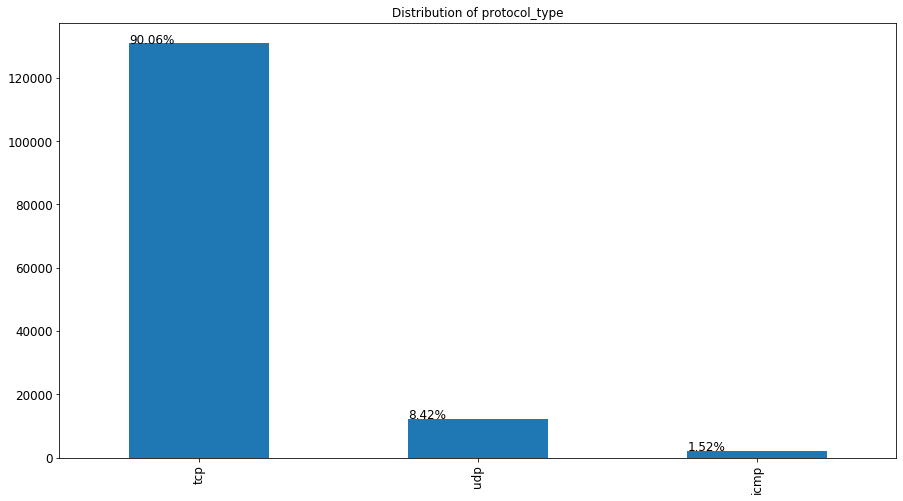

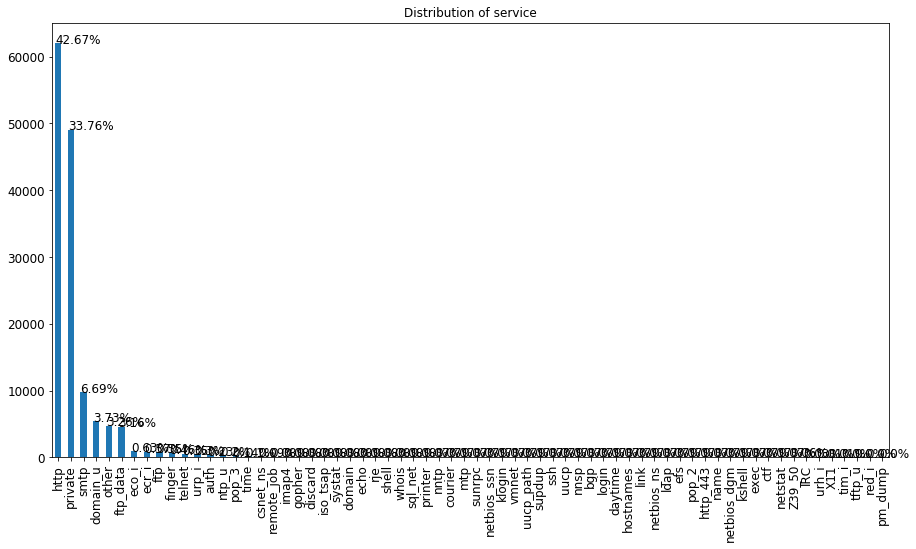

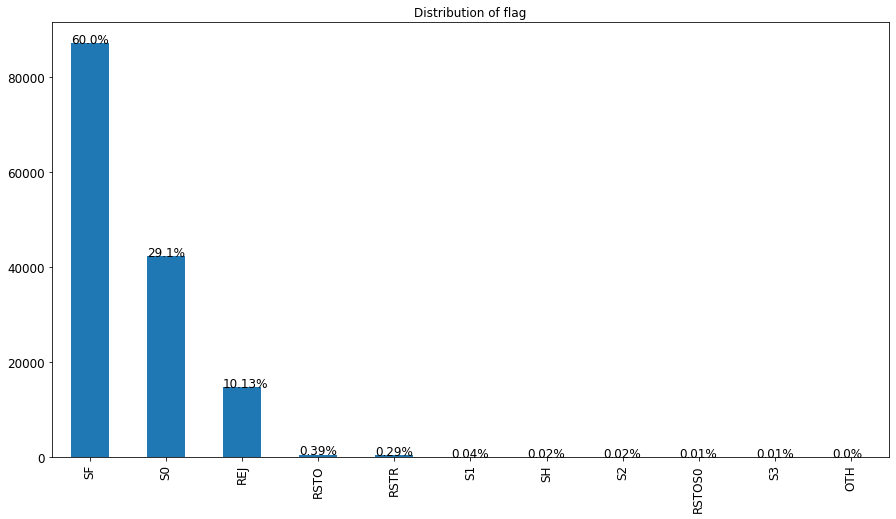

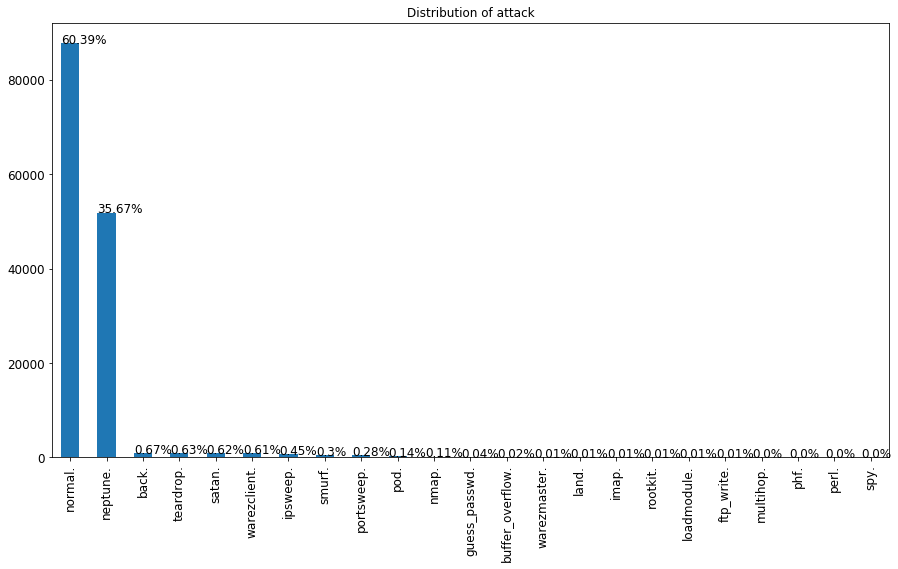

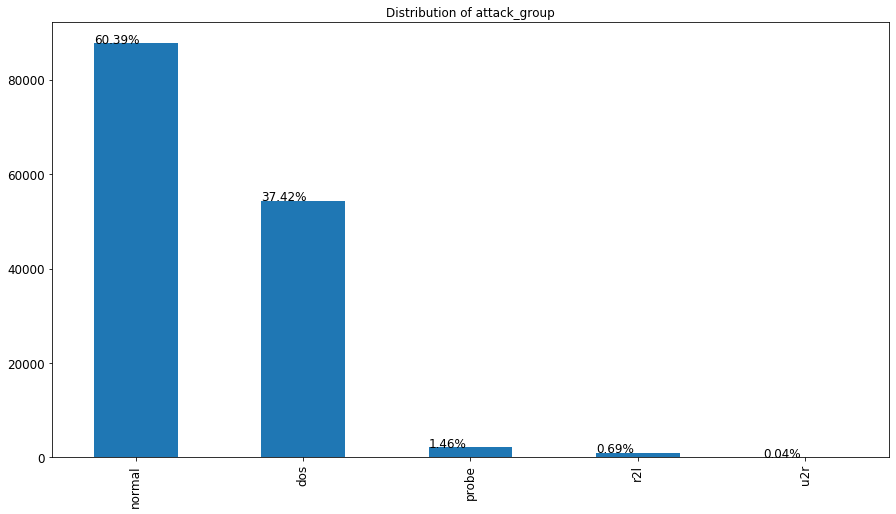

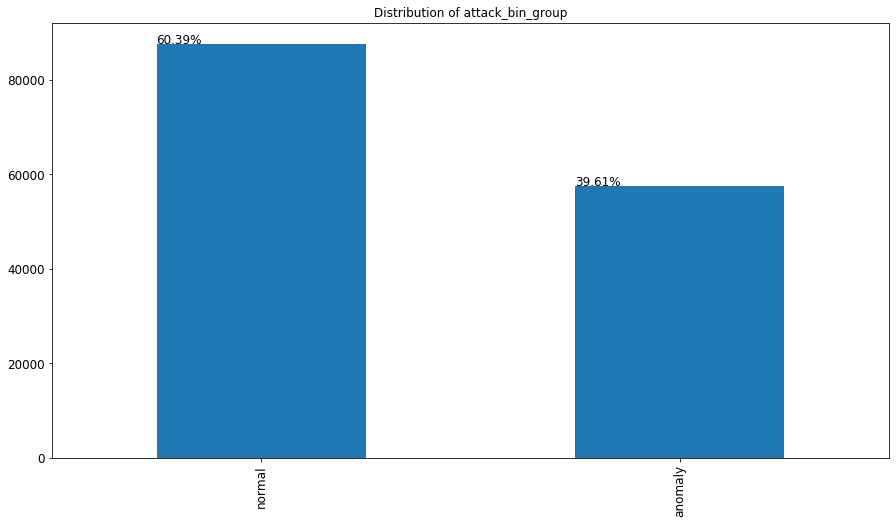

In [24]:
for column in cat_features:
    plot_column_distribution(df_train, column)

<b> Observations: </b>

protocol type: 
- Most of the connections (90.06%) use the protocol "tcp"

flag:

- Flag feature describes the status of the connection – Normal or Error and whether the flag was raised or not.
- Each value in the flag feature represent a different scenario, we will use this feature AS IS.

service:
- Service column has 66 unique value, applying onehot encoding on this columns leads to new 66 columns. lets understand the importance of this column and try to bin if possible.

label:
- Most of the datapoints (60.39%) labeled normal as normal connection and the rest 39.61 % as bad connections.
- In the category of bad connections neptune tops it with 35.67%.
- The categories rootkit, loadmodule, ftp_write,multihop, phf, perl, and spy have very few data points (=<10).
- In conlcusion, the dataset is very imbalaned, we should consider this data imbalnce while building the model to classify the datapoints righly to target lable without bias. 

##### <a> 3.2.1 service column understanding </a>

Lets see the influence of service column on target label.

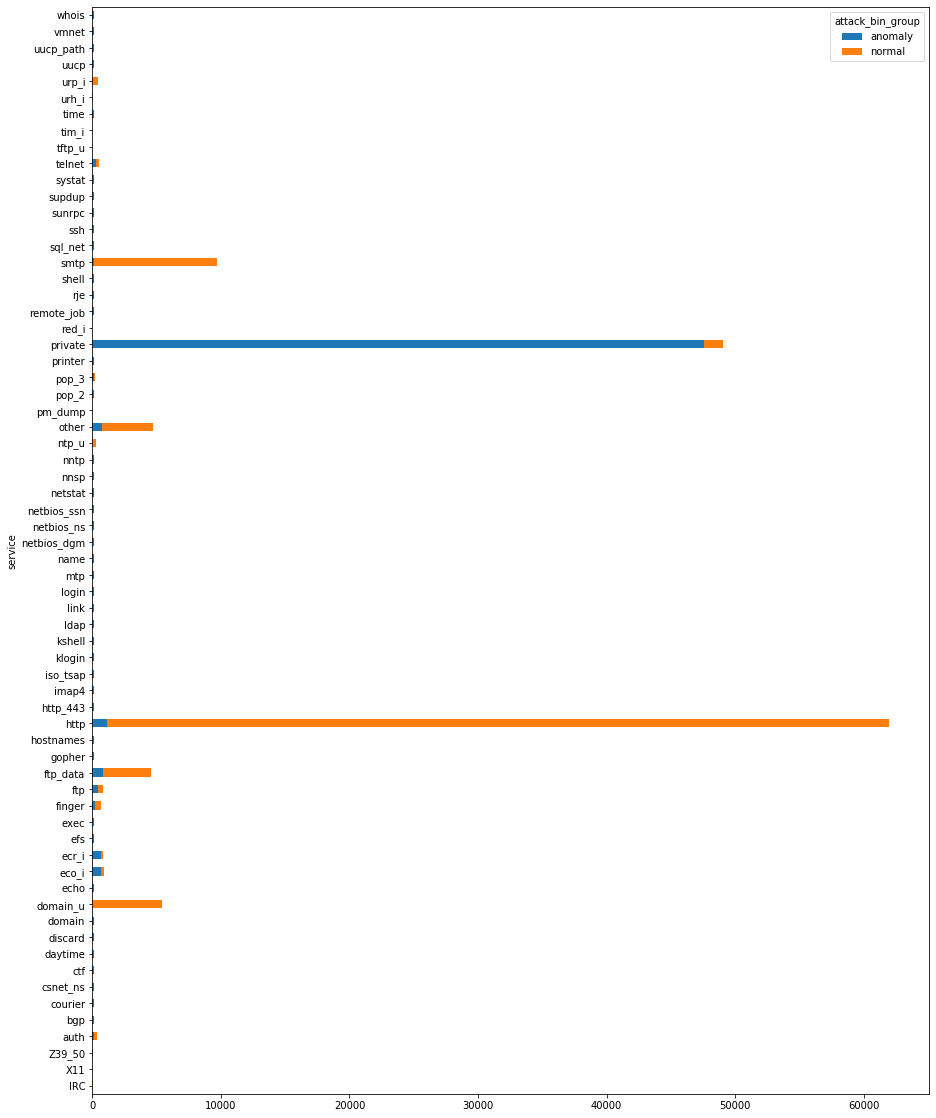

In [25]:
crosstab_service = pd.crosstab(df_train['service'], df_train['attack_bin_group'])
ax = crosstab_service.plot(kind='barh', stacked = True, figsize=(15, 20))

Normalized distribution of service column with overlay of target lable (anomoly vs target)

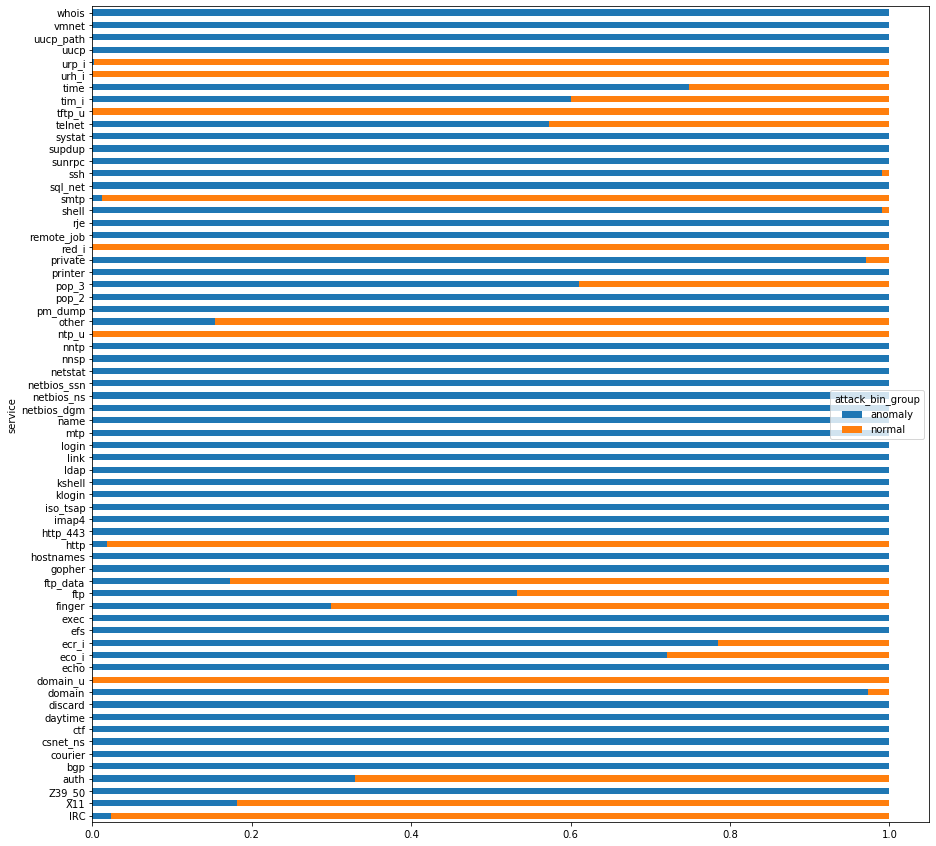

In [26]:
crosstab_service_norm = crosstab_service.div(crosstab_service.sum(1), axis = 0)
crosstab_service_norm.plot(kind='barh', stacked = True, figsize=(15, 15))

Cross tables representing numbers and percentages.

In [27]:
crosstab_service_tab = pd.crosstab(df_train['attack_bin_group'], df_train['service'])

In [28]:
crosstab_service_tab

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
attack_bin_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anomaly,1,2,91,108,104,108,126,97,103,116,111,1,112,660,647,101,98,200,425,795,117,103,1171,99,117,115,106,98,101,102,103,107,98,98,102,107,95,105,108,0,730,1,101,122,108,47594,0,120,111,110,123,110,104,107,105,115,293,0,3,104,0,1,105,106,106,110
normal,42,9,0,220,0,0,0,0,0,0,3,5424,0,256,177,0,0,468,373,3797,0,0,60829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,290,4006,0,0,78,0,1463,1,0,0,1,9598,0,1,0,0,0,219,1,2,35,14,442,0,0,0,0


In [29]:
round(crosstab_service_tab.div(crosstab_service_tab.sum(0), axis = 1)*100, 1)

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
attack_bin_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anomaly,2.3,18.2,100.0,32.9,100.0,100.0,100.0,100.0,100.0,100.0,97.4,0.0,100.0,72.1,78.5,100.0,100.0,29.9,53.3,17.3,100.0,100.0,1.9,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,15.4,100.0,100.0,61.0,100.0,97.0,0.0,100.0,100.0,99.1,1.3,100.0,99.0,100.0,100.0,100.0,57.2,0.0,60.0,74.8,0.0,0.2,100.0,100.0,100.0,100.0
normal,97.7,81.8,0.0,67.1,0.0,0.0,0.0,0.0,0.0,0.0,2.6,100.0,0.0,27.9,21.5,0.0,0.0,70.1,46.7,82.7,0.0,0.0,98.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,84.6,0.0,0.0,39.0,0.0,3.0,100.0,0.0,0.0,0.9,98.7,0.0,1.0,0.0,0.0,0.0,42.8,100.0,40.0,25.2,100.0,99.8,0.0,0.0,0.0,0.0


Observations

- We see a few service categories (example: bgp, courier, csnet_ns etc...) represent only anomoly connections.
- In otherway, a few service categories (example: domain_u, ntp_u, red_i etc...) represent only normal connections.
- But there are service categories (example: auth, eco_i, ecr_i etc...) representing both normal and anomoly connections.
- The majority of connections belong to service category http (42.67%) followed by private (33.76%) and smtp (6.69%).

Based on the following observations, the service category can be categorized into following groups good, bad, and ambivalent. Incase of new categories, this look up needs to be updated.

In [30]:
services = ['IRC' ,'X11' ,'Z39_50' ,'auth' ,'bgp' ,'courier' ,'csnet_ns' ,'ctf' ,'daytime' ,'discard' ,'domain' ,
            'domain_u' ,'echo', 'eco_i' ,'ecr_i' ,'efs' ,'exec' ,'finger' ,'ftp' ,'ftp_data' ,'gopher' ,'hostnames',
            'http' ,'http_443' ,'imap4' ,'iso_tsap', 'klogin' ,'kshell' ,'ldap' ,'link' ,'login' ,'mtp' ,'name',
            'netbios_dgm' ,'netbios_ns' ,'netbios_ssn' ,'netstat' ,'nnsp', 'nntp' ,'ntp_u' ,'other' ,'pm_dump',
            'pop_2' ,'pop_3' ,'printer' ,'private' ,'red_i' ,'remote_job' ,'rje' ,'shell' ,'smtp', 'sql_net','ssh',
            'sunrpc' ,'supdup' ,'systat' ,'telnet' ,'tftp_u' ,'tim_i' ,'time' ,'urh_i' ,'urp_i' ,'uucp','uucp_path',
            'vmnet' ,'whois']

In [31]:
x_services = ['ambivalent' ,'ambivalent', 'bad', 'ambivalent', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'ambivalent',
              'good', 'bad', 'ambivalent', 'ambivalent', 'bad', 'bad', 'ambivalent', 'ambivalent', 'ambivalent', 
              'bad', 'bad', 'ambivalent', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 
              'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'ambivalent', 'bad', 'bad', 'ambivalent', 'bad',
              'ambivalent', 'good', 'bad', 'bad', 'ambivalent', 'ambivalent', 'bad', 'bad', 'bad', 'bad', 'bad', 
              'ambivalent', 'good', 'ambivalent', 'ambivalent', 'good', 'ambivalent', 'bad', 'bad', 'bad', 'bad']

service_mapping = {}
for service, X_service in zip(services, x_services):
    service_mapping[service]=X_service

# incase of missing mapping, the catgeory is mapped to ambivalent
df_train['X_service'] = df_train.service.apply(lambda val: service_mapping.get(val, 'ambivalent'))
df_test['X_service'] = df_test.service.apply(lambda val: service_mapping.get(val, 'ambivalent'))

In [32]:
df_train.X_service.value_counts()

ambivalent    135218
good            5731
bad             4347
Name: X_service, dtype: int64

In [33]:
df_test.X_service.value_counts()

ambivalent    68004
good           2684
bad            2374
Name: X_service, dtype: int64

#### <a> 3.3 Boolean Features </a>

In [34]:
bool_features = df_train.columns[df_train.dtypes=='bool']

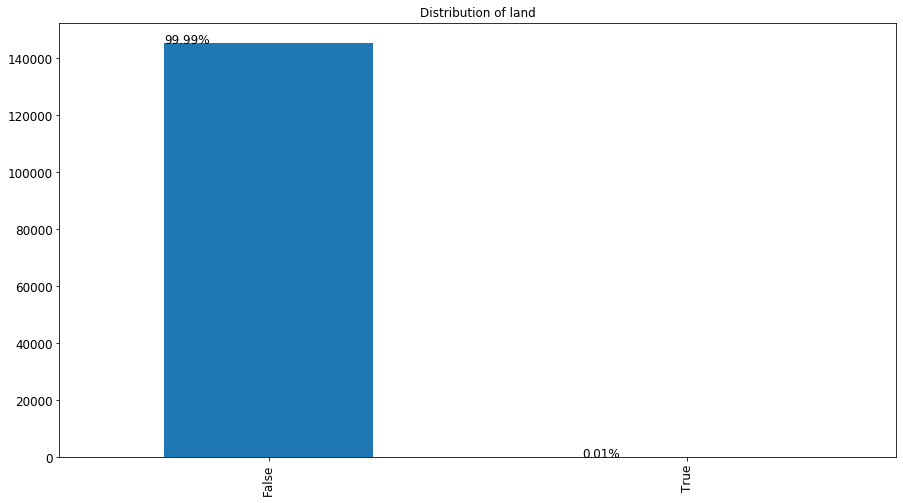

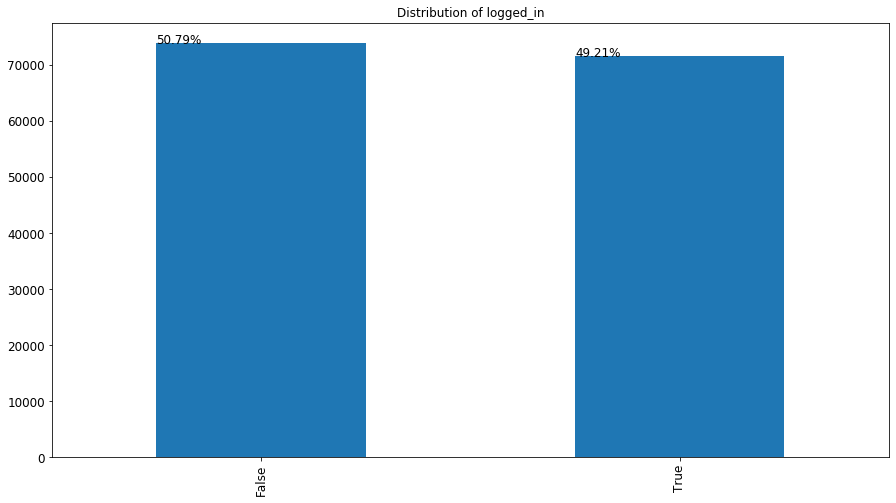

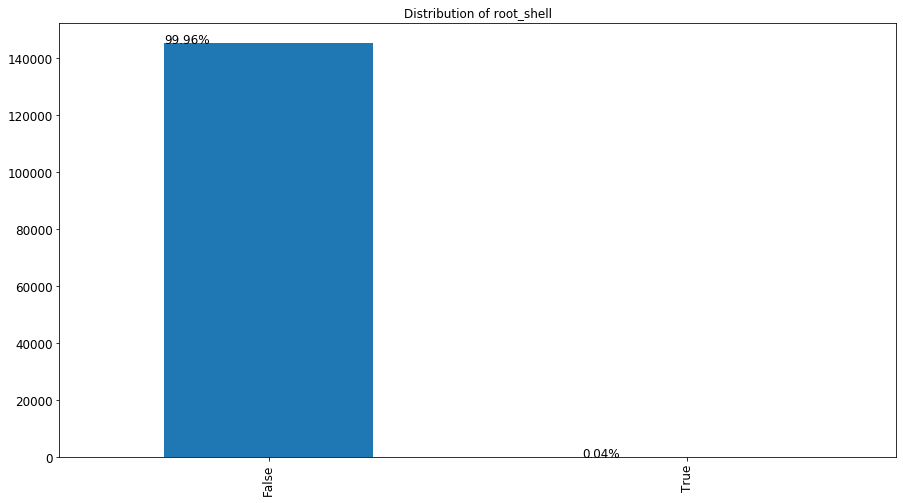

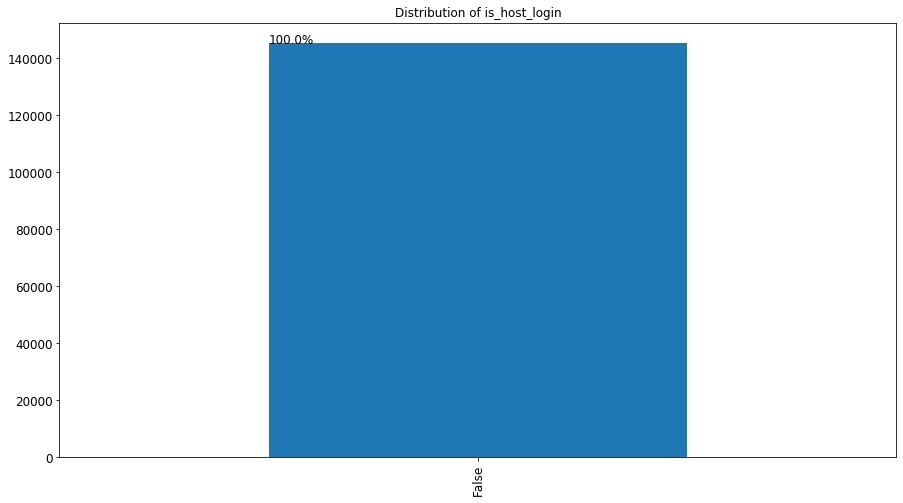

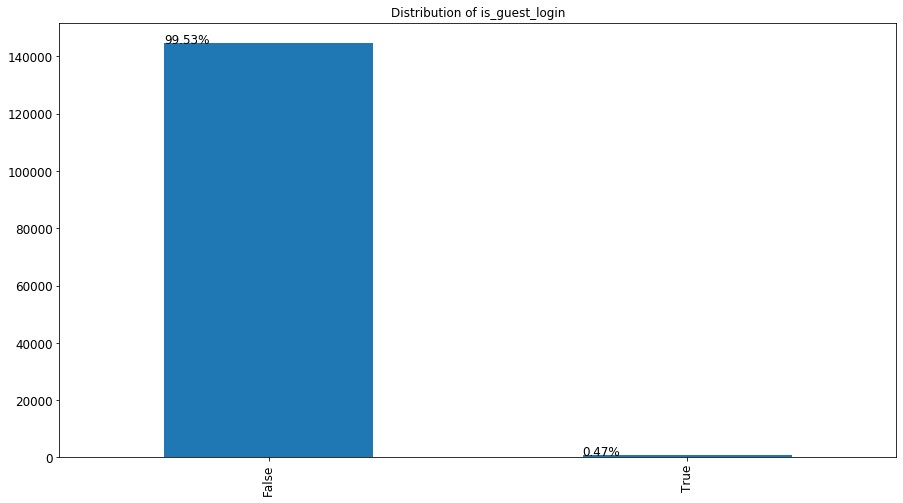

In [35]:
for column in bool_features:
    plot_column_distribution(df_train, column)

<b> Observations: </b>

- the feature <b> is_host_login </b> is constant so, we ingnore this column for both training and prediction.

#### <a> 3.4 Numerical Features </a>

In [36]:
num_columns = df_train.columns[(df_train.dtypes!='bool') & (df_train.dtypes!='object')]

In [37]:
df_train[num_columns].describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.0,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000,145296.000000
mean,0.433006,1.196124,6.520820,0.020241,0.000048,0.100374,0.000516,0.010372,0.000124,0.020978,0.003682,0.000372,0.003421,0.0,5.054365,10.050862,0.291992,0.292236,0.108521,0.108582,0.654509,0.040649,0.093262,5.782967,3.885193,0.552557,0.061279,0.091370,0.019073,0.291992,0.291260,0.110657,0.107849
std,12.393808,46.829828,57.074843,0.239605,0.010161,1.428214,0.028614,0.456236,0.014369,0.586976,0.177758,0.020318,0.067158,0.0,48.452074,14.386449,0.453369,0.454102,0.309082,0.309082,0.446975,0.120483,0.242310,39.582924,33.190669,0.456229,0.146729,0.238647,0.060486,0.452881,0.453613,0.306152,0.304443
min,-128.000000,-128.000000,-128.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,-31.000000,0.000000,0.000000,0.000000,0.0,-128.000000,-128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-128.000000,-128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,-1.000000,-1.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,0.760000,0.020004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,27.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,15.000000,15.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.059998,0.000000,8.000000,12.000000,1.000000,0.070007,0.029999,0.020004,1.000000,1.000000,0.000000,0.000000
max,127.000000,127.000000,127.000000,3.000000,3.000000,30.000000,5.000000,116.000000,2.000000,119.000000,28.000000,2.000000,8.000000,0.0,127.000000,127.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,127.000000,127.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### <a> 3.4.1 Features with zero variance </a>

Find the features with zero variance since these feartures will not help the model learn the characteristics of the problem.

In [38]:
df_train[num_columns].describe().transpose()[df_train[num_columns].describe().transpose()['std'] <= 0]

,count,mean,std,min,25%,50%,75%,max
num_outbound_cmds,145296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b> Observations </b>

- The feature <b> num_outbound_cmds </b> has zero variance, it takes constant value. 
- We will not consider this feature for both training and prediction.

#### <a> 3.4.2 Features with high variance variance </a>

Find the features with high variance.

In [39]:
df_train[num_columns].describe().transpose().sort_values('std', ascending=False).head(8)

,count,mean,std,min,25%,50%,75%,max
dst_bytes,145296.0,6.520820,57.074843,-128.0,0.0,0.0,37.0,127.0
count,145296.0,5.054365,48.452074,-128.0,1.0,3.0,15.0,127.0
src_bytes,145296.0,1.196124,46.829828,-128.0,-17.0,0.0,27.0,127.0
dst_host_count,145296.0,5.782967,39.582924,-128.0,-1.0,-1.0,8.0,127.0
dst_host_srv_count,145296.0,3.885193,33.190669,-128.0,-1.0,1.0,12.0,127.0
srv_count,145296.0,10.050862,14.386449,-128.0,2.0,7.0,15.0,127.0
duration,145296.0,0.433006,12.393808,-128.0,0.0,0.0,0.0,127.0
hot,145296.0,0.100374,1.428214,0.0,0.0,0.0,0.0,30.0


<b> Observations </b>
- src_bytes, dst_bytes, and count seems to have variance but we can drar any conclusion out from this analysis
- Atleast we don't find any unique identifiers since the unique values (uuid) will have high variance.

#### <a> 3.4.3 correlation matrix </a>

Plot the correlation matrix among numerical features.

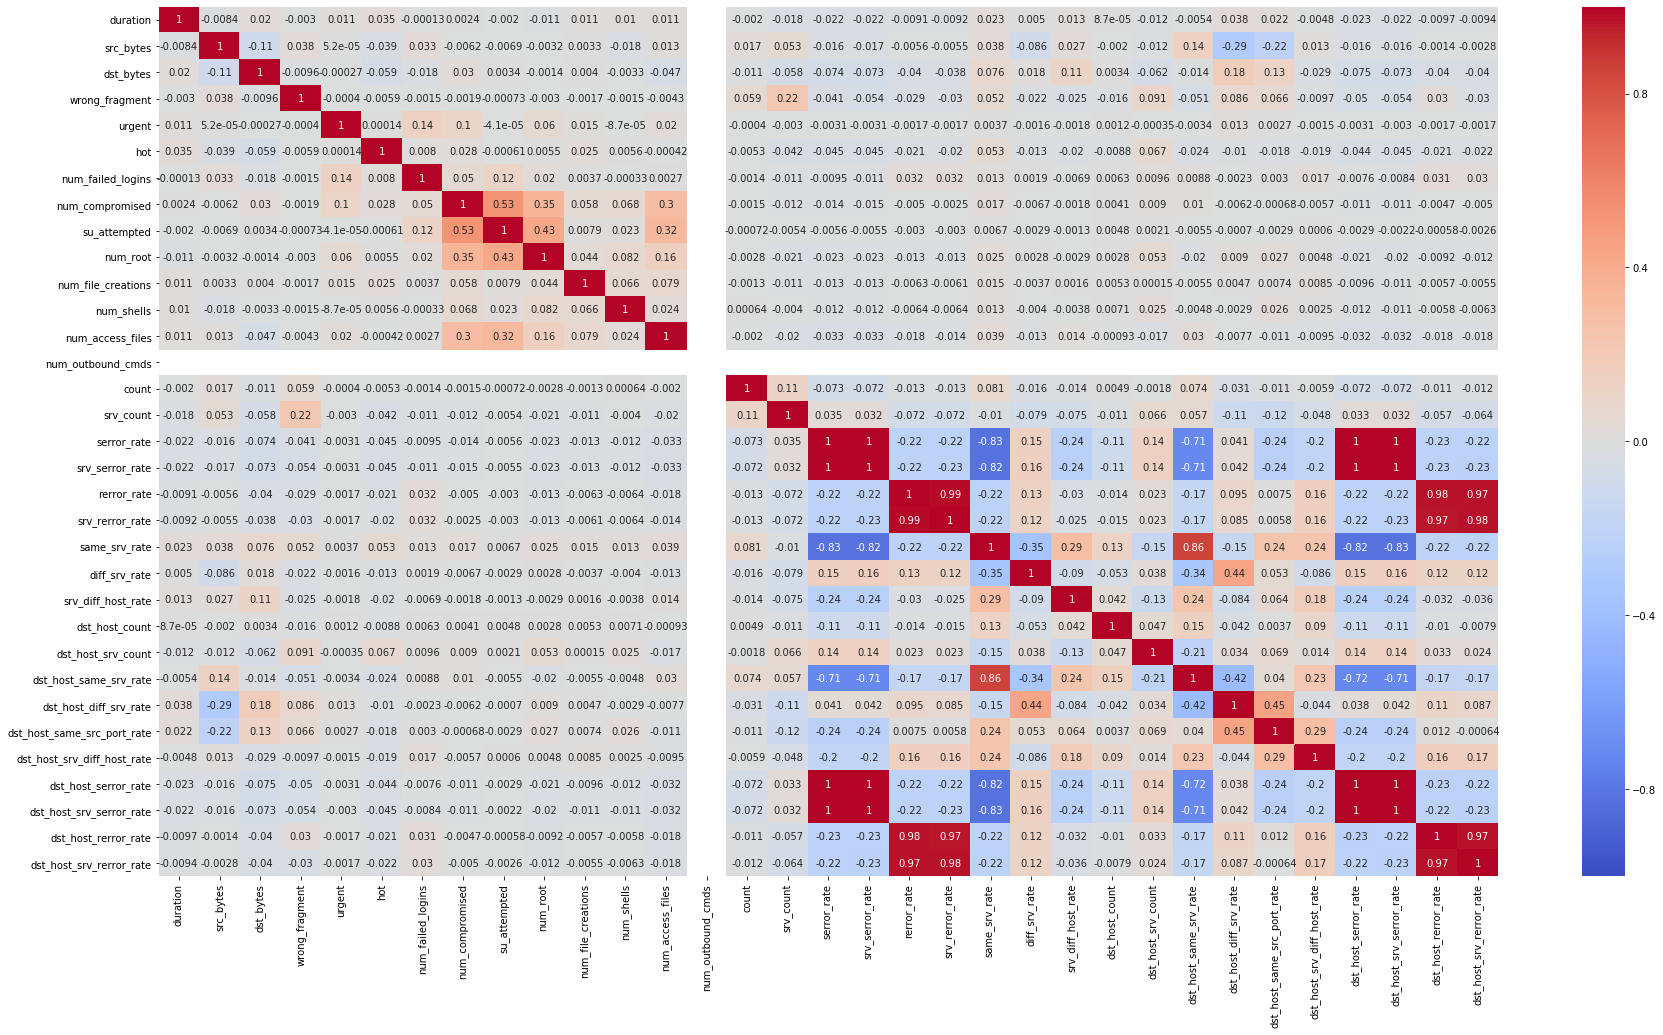

In [40]:
plt.figure(figsize=(30, 16))
sns.heatmap(df_train[num_columns].corr(), vmin=-1,  cmap='coolwarm',annot=True)

<b> Observations </b>
- The feature <b> serror_rate </b> is highly correlated with <b>dst_host_srv_serror_rate, dst_host_serror_rate, and srv_serror_rate</b>.
- The feature <b> srv_serror_rate </b> is highly correlated with <b>dst_host_srv_serror_rate, dst_host_serror_rate, and serror_rate</b>.
- The feature <b> rerror_rate </b> is highly correlated with <b>dst_host_srv_rerror_rate, dst_host_rerror_rate, and srv_rerror_rate</b>.
- The feature <b> srv_rerror_rate </b> is highly correlated with <b>dst_host_srv_rerror_rate, dst_host_rerror_rate, and rerror_rate</b>.
- We will not consider the features <b> rerror_rate </b>, <b> srv_rerror_rate </b>, <b> serror_rate </b>, and <b> srv_serror_rate </b> for training and prediction.
- We will not consider the features <b> dst_host_serror_rate </b>, and <b> dst_host_rerror_rate </b> for training and prediction.


The following are the descriptions of the few features.
- <i>count</i>: Number of connections to the same destination host as the current connection in the past two seconds
- <i>srv_count</i>: Number of connections to the same service (port number) as the current connection in the past two seconds
- <i>serror_rate</i>: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count 
- <i>srv_serror_rate</i>: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count.
- <i>rerror_rate</i>: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count.
- <i>srv_rerror_rate</i>: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count.

- <i>dst_host_count</i>: Number of connections having the same destination host IP address
- <i>dst_host_srv_count</i>: Number of connections having the same port number
- <i>dst_host_serror_rate</i>: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count.
- <i>dst_host_rerror_rate</i>: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count.

Plot the correlation matrix among numerical features after removing highly correlated columns.

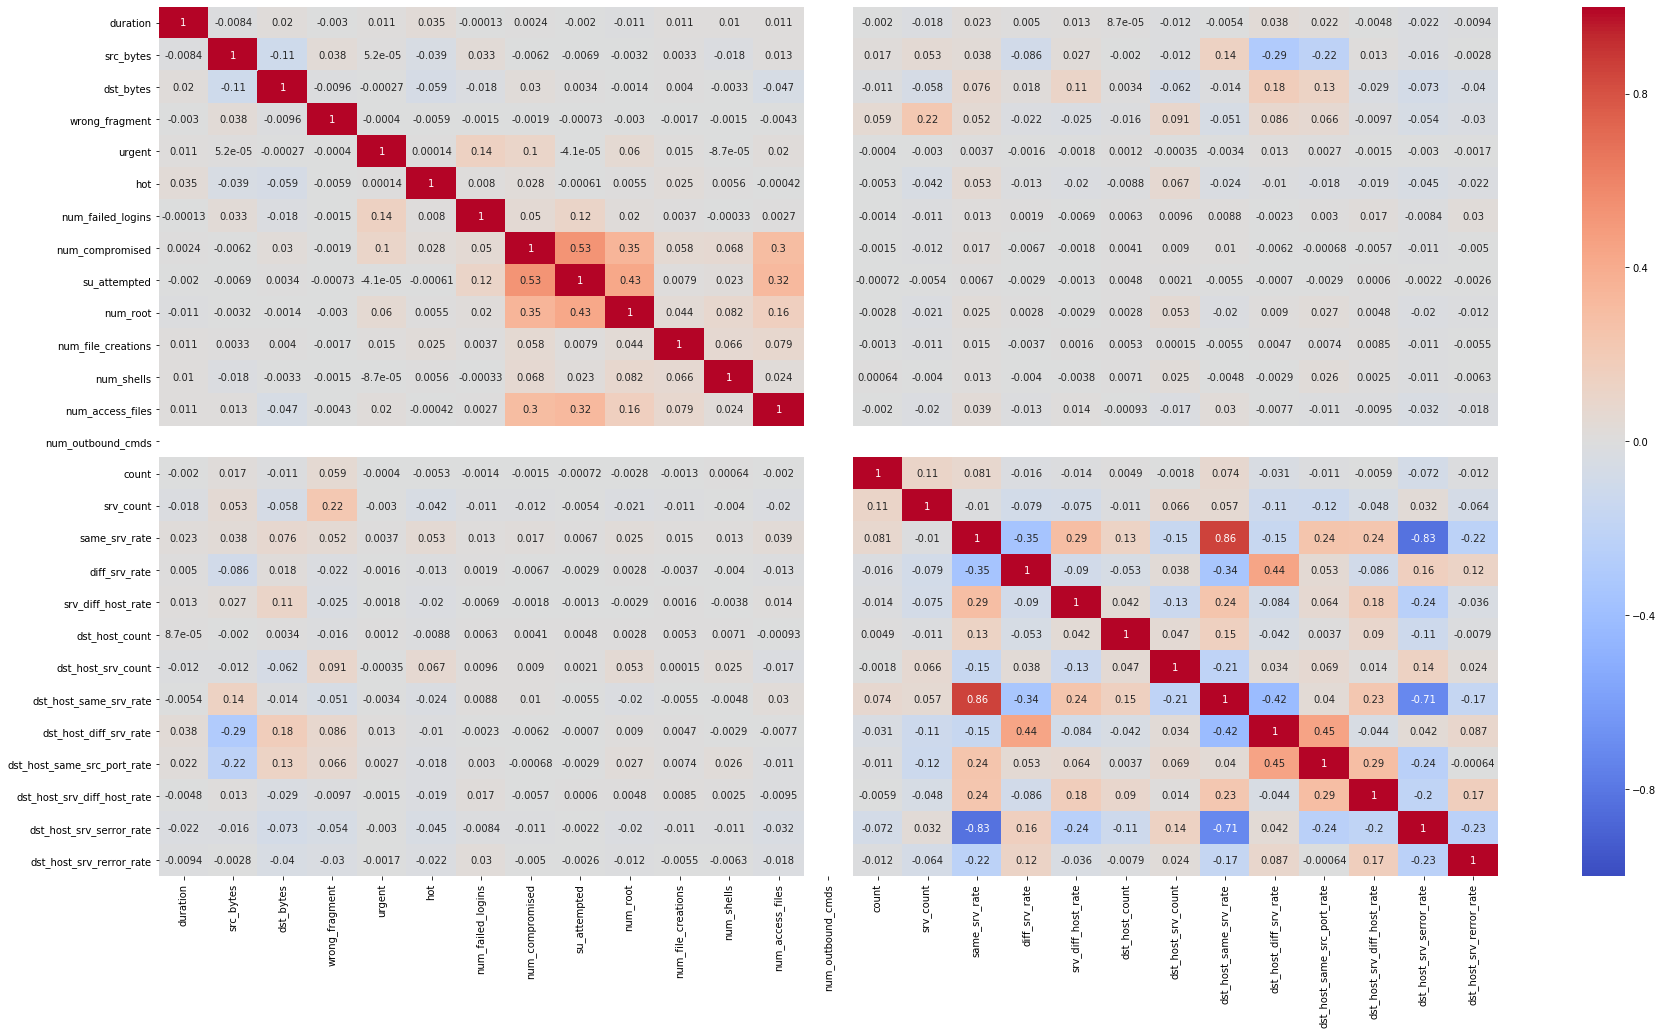

In [41]:
plt.figure(figsize=(30, 16))
fil_num_columns = [col for col in num_columns if col not in 
                   ['serror_rate','srv_serror_rate', 'rerror_rate','srv_rerror_rate',
                    'dst_host_serror_rate', 'dst_host_rerror_rate']]
sns.heatmap(df_train[fil_num_columns].corr(), vmin=-1,  cmap='coolwarm',annot=True)

#### <a> 3.4.4 Distribution </a>

In [42]:
def plot_histograms(dataframe, features, rows, cols, log1p=False):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        if log1p:
            dataframe[feature].hist(log=True, bins=20,ax=ax,facecolor='green')
        else:
            dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='red')
    fig.tight_layout()
    plt.show()

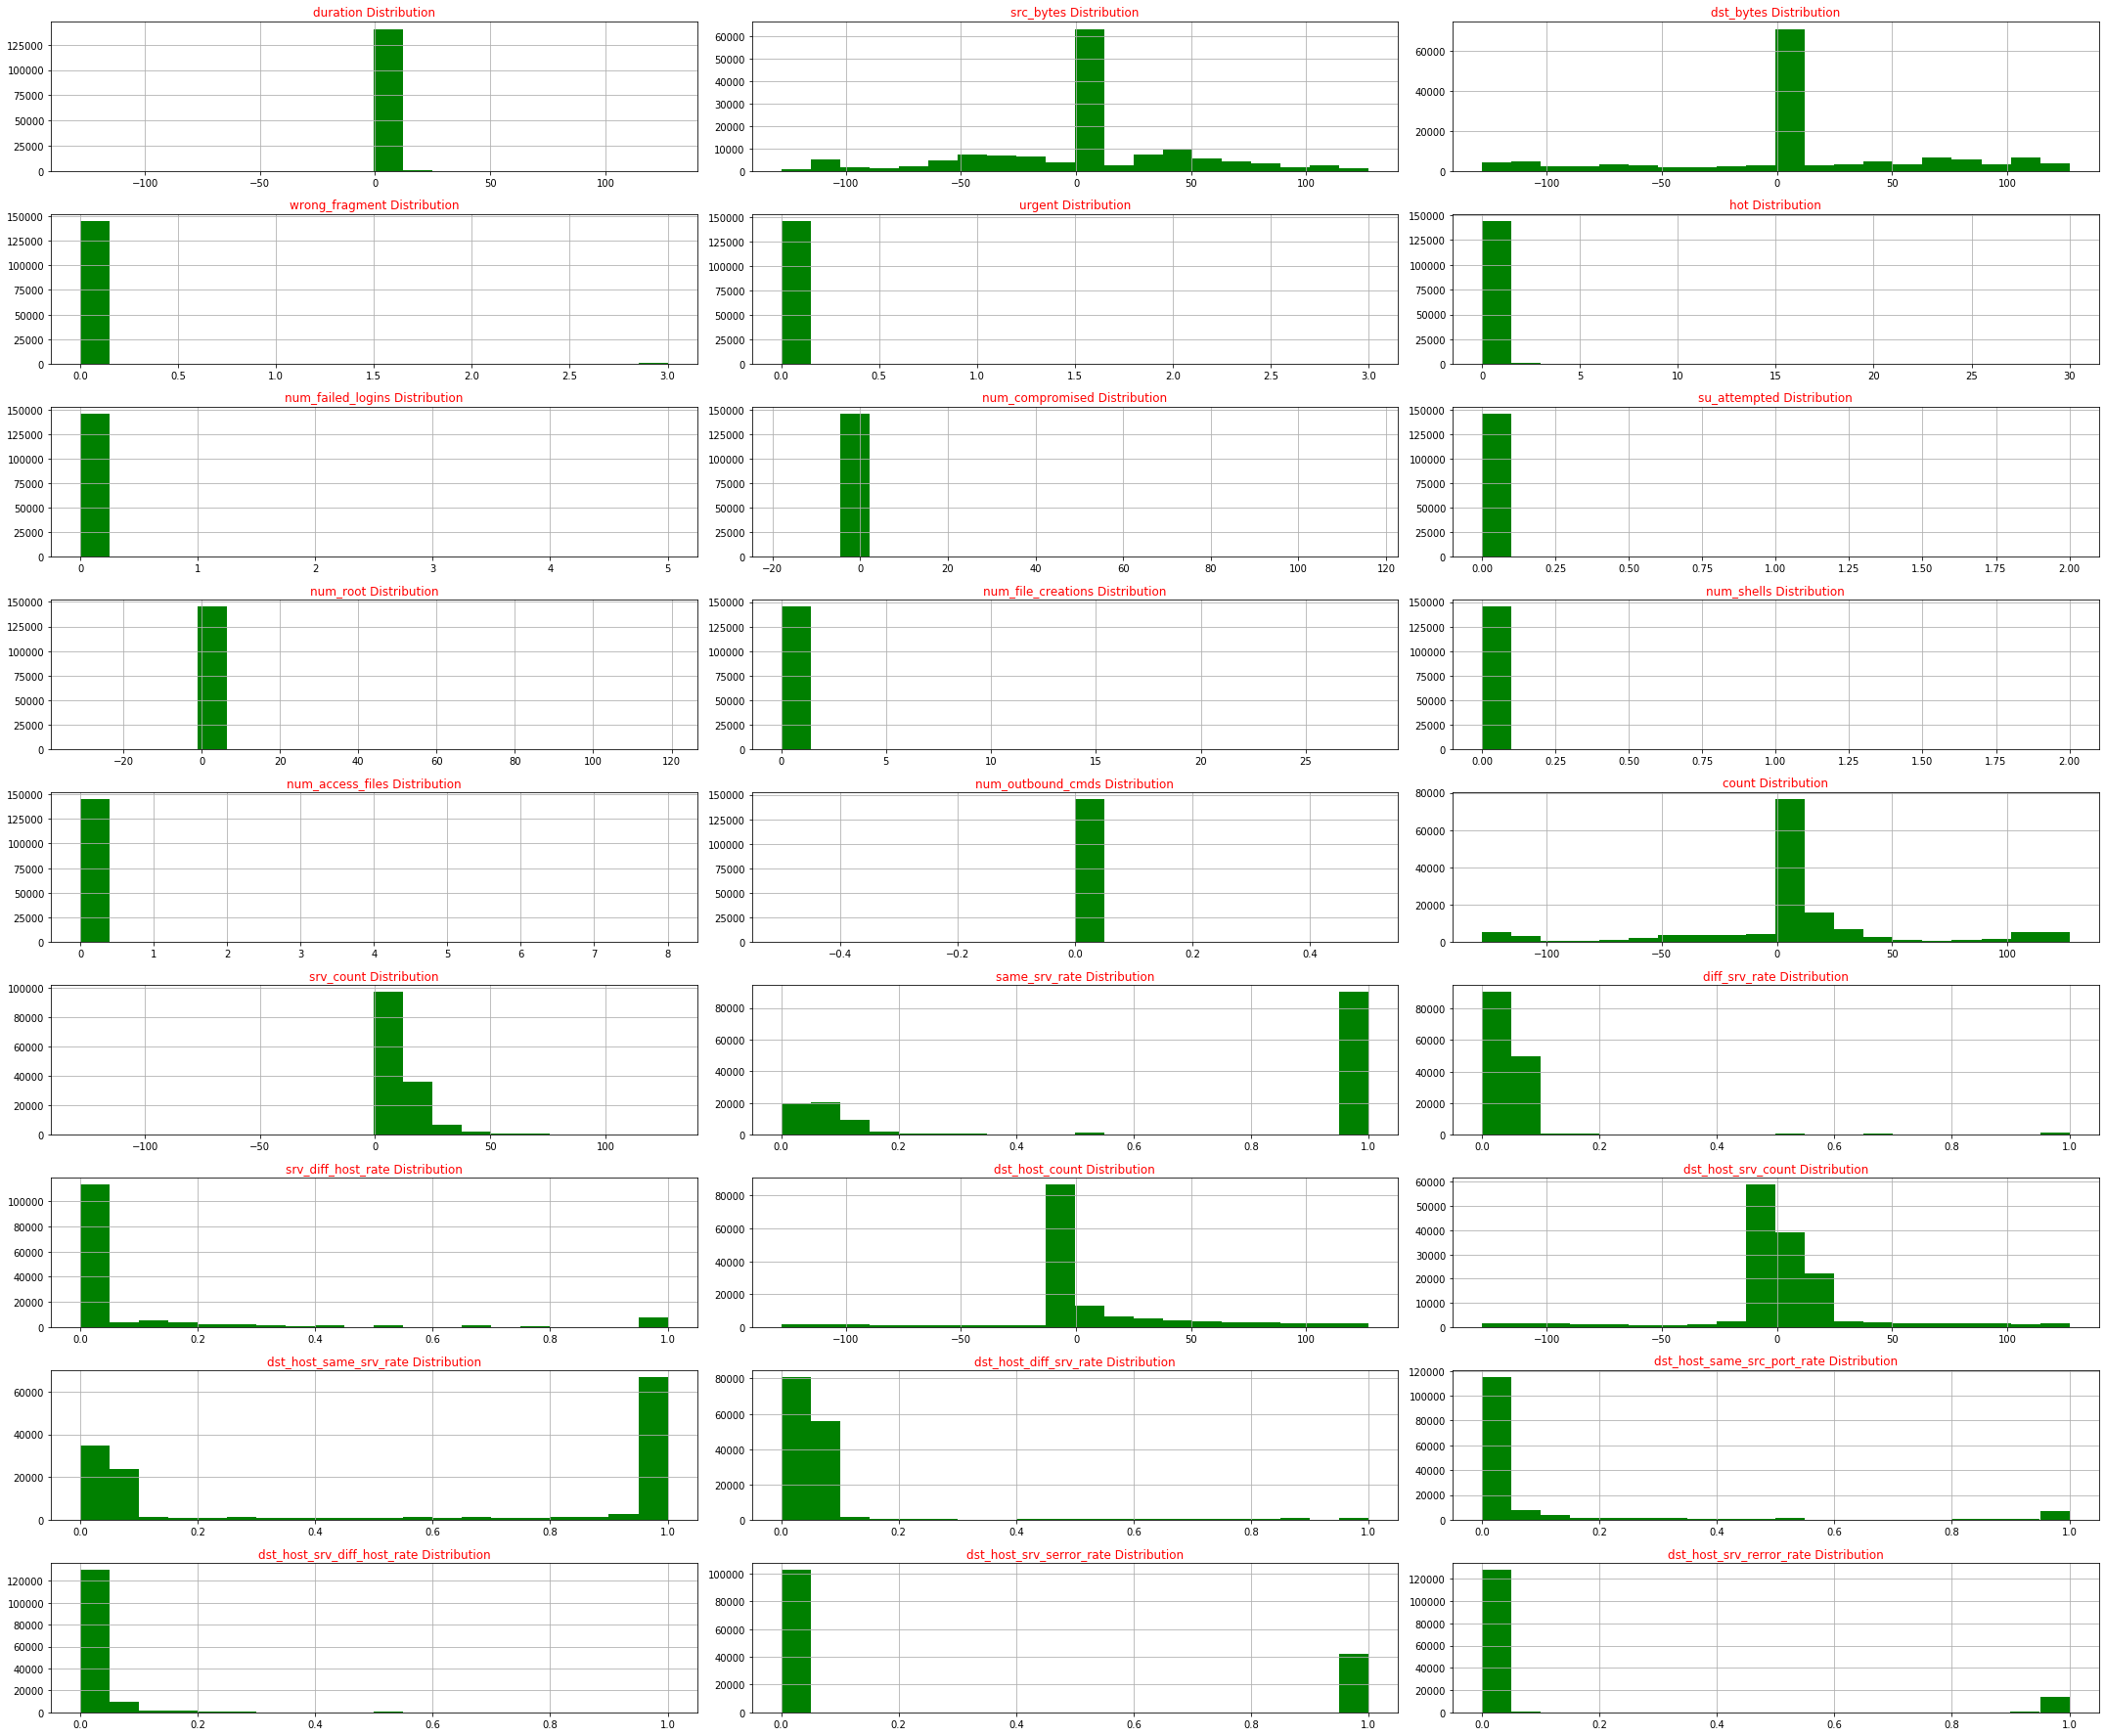

In [43]:
plot_histograms(df_train,fil_num_columns,11,3)

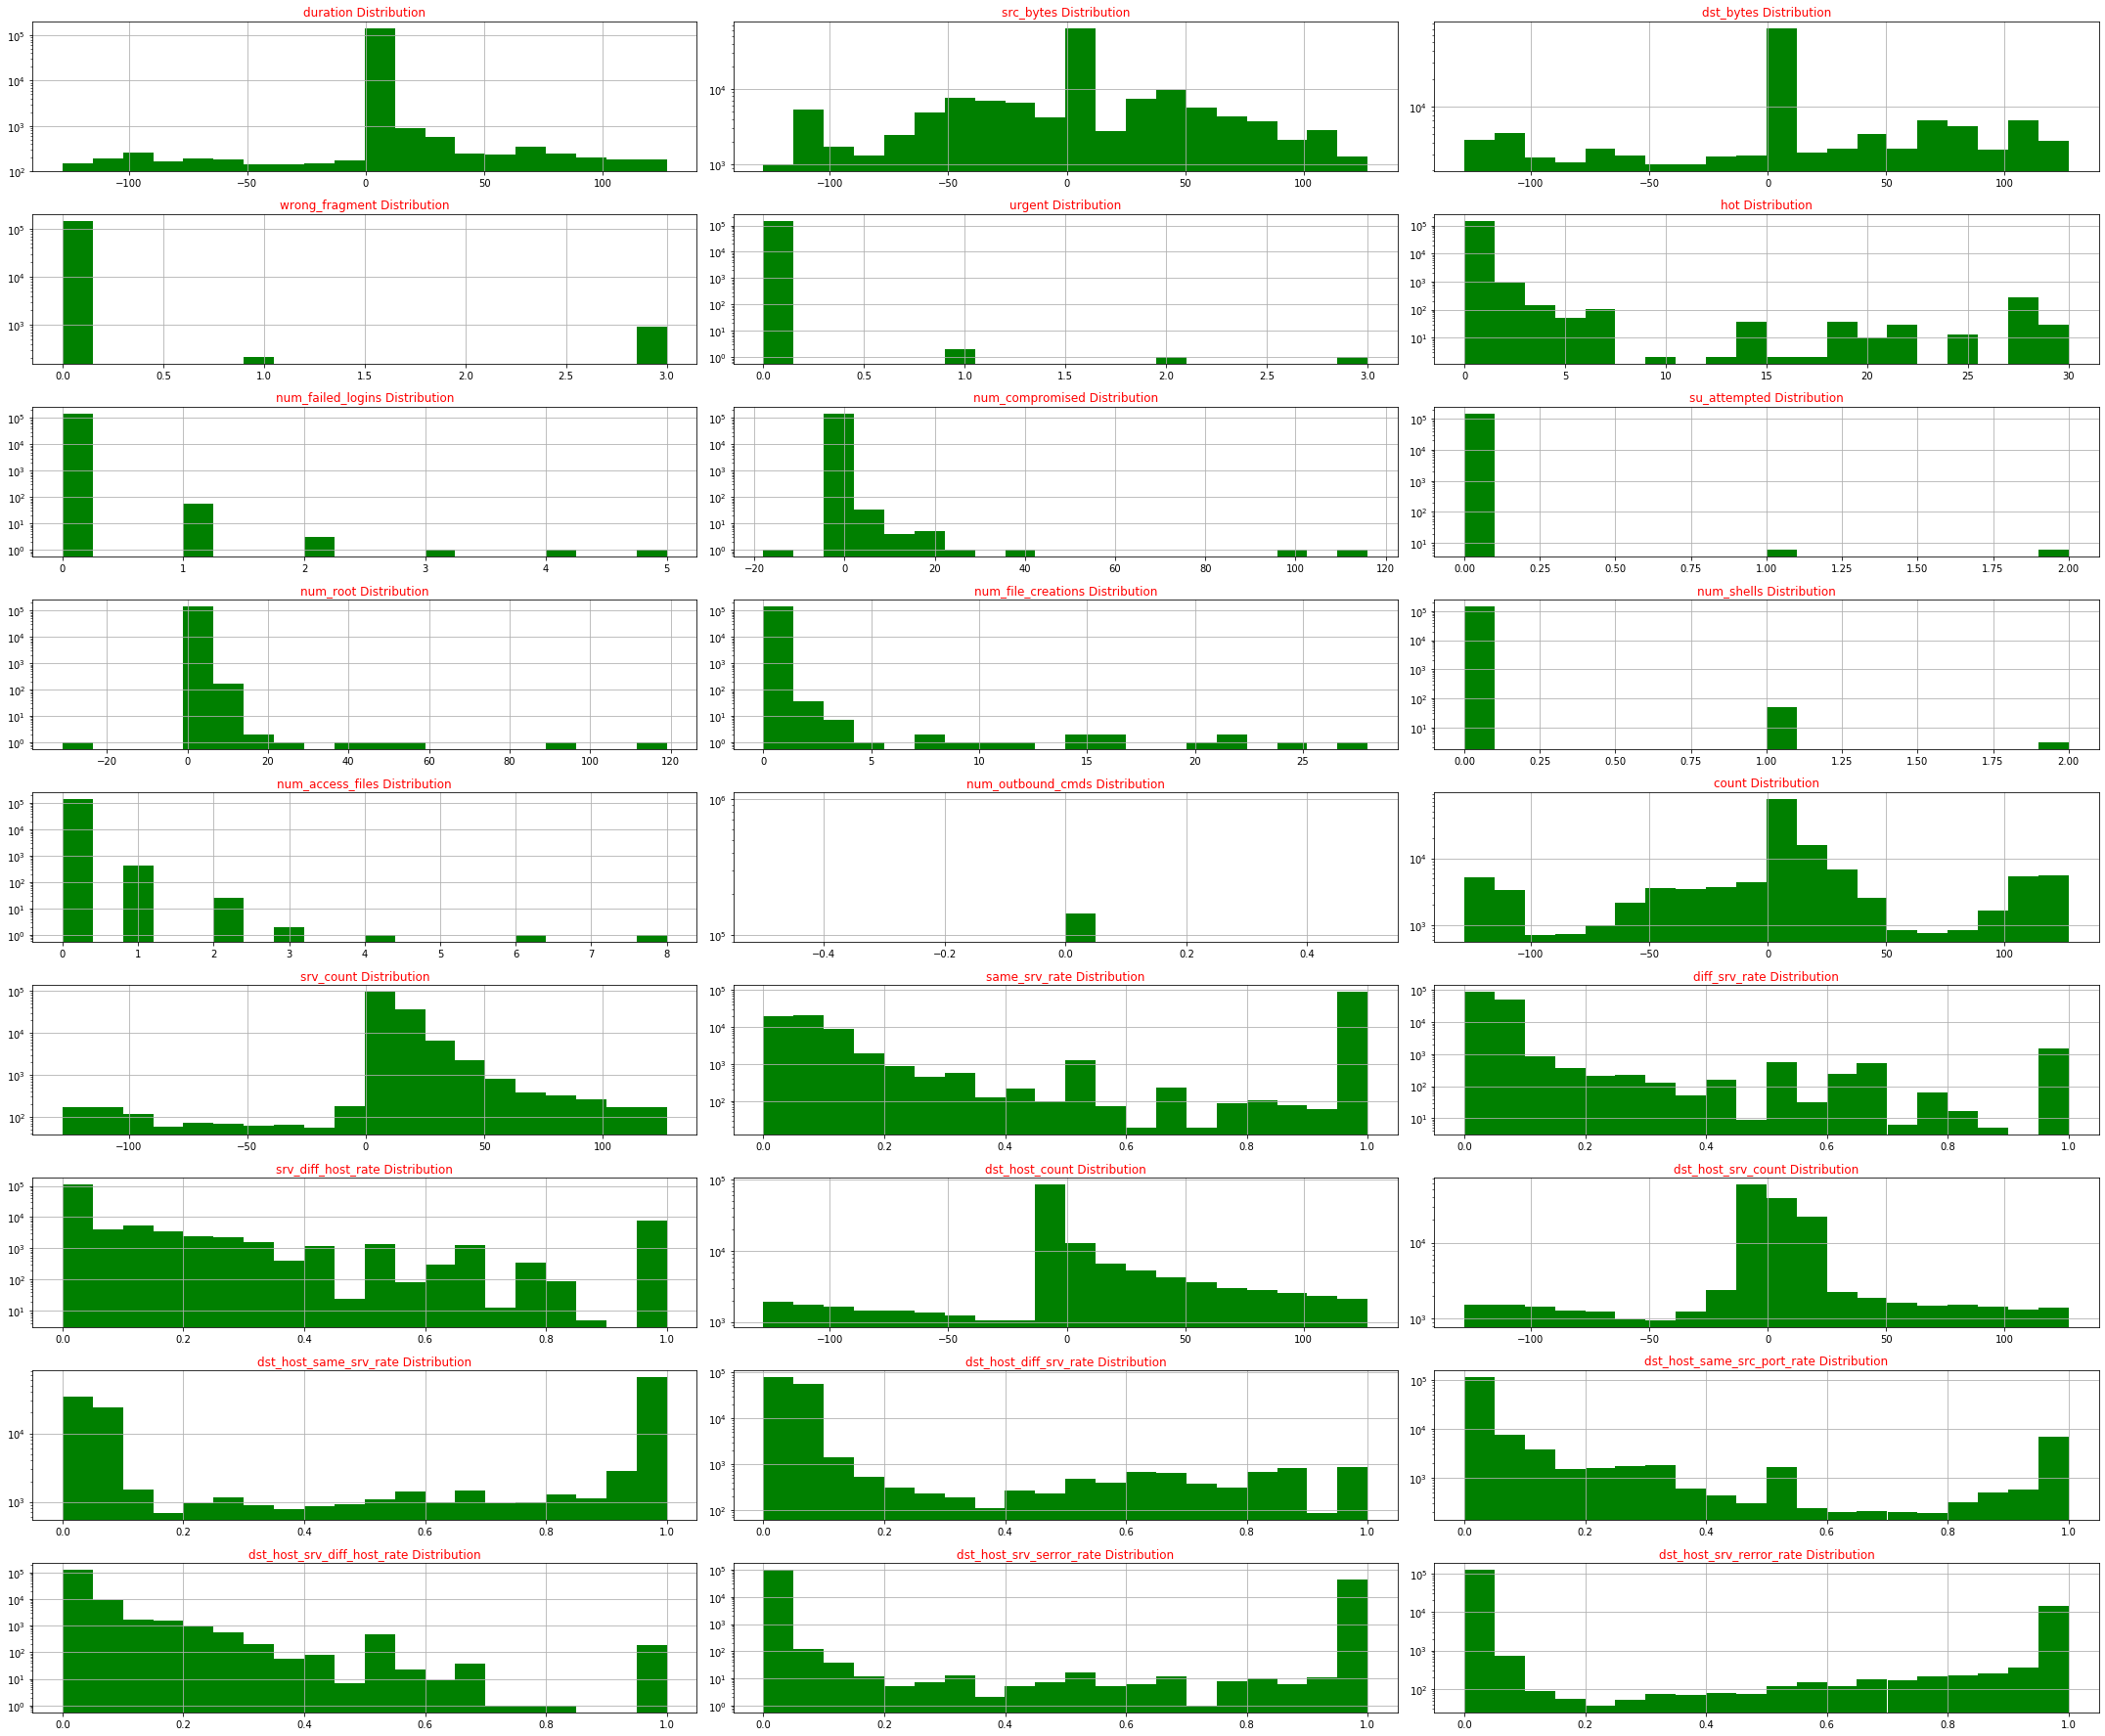

In [44]:
plot_histograms(df_train,fil_num_columns,11,3, True)

<b> Observations: </b>

- The following plots do not give us any clear and satisfactory results.
- We will scale the features while modeling.
- Below are the following options to proceed further with exploratory analysis.
    - Linear subspace mechanisms (PCA/tSNE).
- We can do further analysis to bin the numerical variables by plotting historgrams with label overlay.

### <a> 4. Modeling </a>

#### <a>4.1 Train Test Data Preparation </a>

In [45]:
exclude_features = ['num_outbound_cmds', 'rerror_rate', 'srv_rerror_rate', 'serror_rate', 'srv_serror_rate',
                    'dst_host_serror_rate', 'dst_host_rerror_rate', 'is_host_login','service','attack']
include_features = ['X_service']

X_features = [feature for feature in cnames if feature not in exclude_features] + include_features
y_feature = ['attack_bin_group']

In [46]:
X_train = df_train[X_features]
y_train = df_train[y_feature]
X_test = df_test[X_features]
y_test = df_test[y_feature]

In [64]:
X_train_dummies= pd.get_dummies(X_train)
y_train_dummies= pd.get_dummies(y_train)
X_test_dummies= pd.get_dummies(X_test)
y_test_dummies= pd.get_dummies(y_test)
X_train_dummies.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,X_service_ambivalent,X_service_bad,X_service_good
0,0,-75,74,False,0,0,0,0,True,0,False,0,0,0,0,0,False,8,8,1.0,0.0,0.0,9,9,1.0,0.0,0.109985,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,-17,-26,False,0,0,0,0,True,0,False,0,0,0,0,0,False,8,8,1.0,0.0,0.0,19,19,1.0,0.0,0.049988,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,-21,57,False,0,0,0,0,True,0,False,0,0,0,0,0,False,8,8,1.0,0.0,0.0,29,29,1.0,0.0,0.029999,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,-37,57,False,0,0,0,0,True,0,False,0,0,0,0,0,False,6,6,1.0,0.0,0.0,39,39,1.0,0.0,0.029999,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,-39,-16,False,0,0,0,0,True,0,False,0,0,0,0,0,False,6,6,1.0,0.0,0.0,49,49,1.0,0.0,0.020004,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [61]:
y_train_dummies.head()

,attack_bin_group_anomaly,attack_bin_group_normal
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [47]:
# train and test split available.
# columns in X are categorical, onehotencode them.
# columns in y are also categorical, label it.
# use balanced weight
# stratified k-folding

In [77]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import time
import warnings
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### <a> 4.2 Logistic Regression </a>

In [48]:
def grid_search_cv(X, y):
    tuned_parameters = {"C":np.logspace(-6, 3, 10)}
    clf = LogisticRegression(multi_class='multinomial',
                             solver='lbfgs', 
                             random_state=42, 
                             max_iter=1000)
    logreg_cv = GridSearchCV(clf,
                             tuned_parameters, 
                             cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True))
    logreg_cv.fit(X,y)
    return logreg_cv.best_params_, logreg_cv.best_score_, logreg_cv.best_estimator_

In [62]:
#start_time = time.time()
best_params, best_score, best_model = grid_search_cv(X_train_dummies, y_train_dummies['attack_bin_group_anomaly'])
#print("--- %s seconds ---" % (time.time() - start_time))

In [67]:
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best n_neighbors: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test_dummies, y_test_dummies['attack_bin_group_anomaly'])))

best mean cross-validation score: 0.982
best n_neighbors: {'C': 0.1}
test-set score: 0.953


#### <a> 4.3 Linear SVC </a>

In [53]:
def grid_search_cv(X, y):
    tuned_parameters = {"C":[0.01, 0.1, 1, 10, 100]}
    clf = LinearSVC(verbose=0, max_iter=1000)
    svc_cv = GridSearchCV(clf, tuned_parameters, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True))
    svc_cv.fit(X,y)
    return svc_cv.best_params_, svc_cv.best_score_, svc_cv.best_estimator_

In [68]:
best_params, best_score, best_model = grid_search_cv(X_train_dummies, y_train_dummies['attack_bin_group_anomaly'])

In [69]:
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best n_neighbors: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test_dummies, y_test_dummies['attack_bin_group_anomaly'])))

best mean cross-validation score: 0.982
best n_neighbors: {'C': 0.01}
test-set score: 0.955


#### <a> 4.4 Random forest classifier </a>

In [70]:
def grid_search_cv(X, y):
    param_grid = {'bootstrap': [True],
                  'min_samples_leaf': [2, 4, 8],
                  'min_samples_split': [2, 4, 8, 16],
                  'n_estimators': [100, 150, 200, 300]}
    clf = RandomForestClassifier(random_state = 42)
    rf_cv = GridSearchCV(estimator = clf, param_grid = param_grid,
                         cv=3, n_jobs=-1, verbose=2, 
                         return_train_score=True)
    rf_cv.fit(X,y)
    return rf_cv.best_params_, rf_cv.best_score_, rf_cv.best_estimator_, rf_cv.cv_results_

In [71]:
#start_time = time.time()
best_params, best_score, best_model, cv_results = grid_search_cv(X_train_dummies, y_train_dummies['attack_bin_group_anomaly'])
#print("--- %s seconds ---" % (time.time() - start_time))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 14.1min finished


In [72]:
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best n_neighbors: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test_dummies, y_test_dummies['attack_bin_group_anomaly'])))

best mean cross-validation score: 0.965
best n_neighbors: {'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 100}
test-set score: 0.968


In [75]:
y_pred = best_model.predict(X_test_dummies)
count_misclassified = (y_test_dummies['attack_bin_group_anomaly'] != y_pred).sum()
print('misclassified datapoints: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_dummies['attack_bin_group_anomaly'], y_pred)
print('accuracy: {:.3f}'.format(accuracy))

misclassified datapoints: 2344
accuracy: 0.968


In [82]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [83]:
confusion_matrix(y_test_dummies['attack_bin_group_anomaly'],y_pred)

array([[47622,   270],
       [ 2074, 23096]], dtype=int64)

In [84]:
print(classification_report(y_test_dummies['attack_bin_group_anomaly'], y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     47892
           1       0.99      0.92      0.95     25170

    accuracy                           0.97     73062
   macro avg       0.97      0.96      0.96     73062
weighted avg       0.97      0.97      0.97     73062



#### <a> 4.4 Feature selection </a>

In [136]:
# apply models for comparision

#### <a> 4.5 Feature Extrapolation </a>

In [137]:
# apply models for comparision